In [61]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to C:\Users\tunji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tunji/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\tunji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
#!pip install -U gensim

In [63]:
train = pd.read_csv ("D:\\NLP_SentimentA_RTE_Data\\trainData.csv")


In [64]:
test = pd.read_csv ("D:\\NLP_SentimentA_RTE_Data\\testData.csv")
test2= pd.read_csv ("D:\\NLP_SentimentA_RTE_Data\\DataFromPl2.csv")

In [65]:
test.head(10)

,Response,Sentiment
0,"Great effort so far, can you explain to me how...",1
1,I would tell Aaron that he did such a great jo...,0
2,"Hi Aaron,you did a good job . almost there. o...",0
3,Almost perfect! You missed a step right at the...,0
4,I would commend him for following the directio...,0
5,Thank you for writing the problem and your ans...,0
6,Try adding 118 and 8.,0
7,Thank you for showing me your work Lucy. You w...,1
8,I would simply show him where he made the mist...,0
9,Good effort Lucy in solving this. Can you plea...,1


0    77
1    48
Name: Sentiment, dtype: int64


C:\Users\tunji\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Sentiment'>

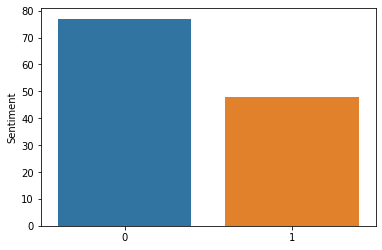

In [66]:
import seaborn as sns

x=train['Sentiment'].value_counts()
print(x)
sns.barplot(x.index,x)

# There are more less desired responses in the training data than desired responses

In [67]:
#!pip install seaborn

In [68]:
train['word_count'] = train['Response'].apply(lambda x: len(str(x).split()))
print(train[train['Sentiment']==1]['word_count'].mean()) #desired responses 
print(train[train['Sentiment']==0]['word_count'].mean()) #less desired responses

25.458333333333332
37.18181818181818


# Number of words in a response: Less desired responses  are more wordy than the desired responses

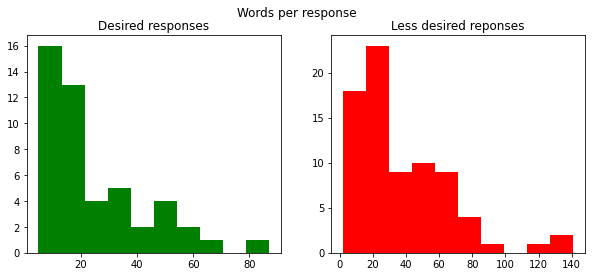

In [69]:
# PLOTTING WORD-COUNT
import matplotlib.pyplot as plt

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=train[train['Sentiment']==1]['word_count']
ax1.hist(train_words,color='green')
ax1.set_title('Desired responses')
train_words=train[train['Sentiment']==0]['word_count']
ax2.hist(train_words,color='red')
ax2.set_title('Less desired reponses')
fig.suptitle('Words per response')
plt.show()

In [70]:
train['char_count'] = train['Response'].apply(lambda x: len(str(x)))
print(train[train['Sentiment']==1]['char_count'].mean()) #Desired
print(train[train['Sentiment']==0]['char_count'].mean()) #Less desired

130.29166666666666
190.01298701298703


# The average characters in a desired response 130.2  as compared to an average of 190  characters in a less desired response

# Below:
# Stop-word removal: We can remove a list of generic stop words from the English vocabulary using nltk. A few such words are ‘i’,’you’,’a’,’the’,’he’,’which’ etc.

# Stemming: Refers to the process of slicing the end or the beginning of words with the intention of removing affixes(prefix/suffix)

# Lemmatization: It is the process of reducing the word to its base form

In [71]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [72]:
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [73]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [74]:
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [75]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

# Process to clean the response and add the cleaned responses as clea_text column 

In [76]:
train['clean_text'] = train['Response'].apply(lambda x: finalpreprocess(x))
train.head(10)

,Response,Sentiment,word_count,char_count,clean_text
0,I would explain to him that the numbers below ...,0,23,122,would explain number always order right left r...
1,"I'd tell him he's got the hang of it, and it's...",0,74,372,tell get hang clear understood get core main s...
2,I would first tell him that he is very close! ...,0,55,233,would first tell close needs line digit right ...
3,Good job on trying!,0,4,19,good job try
4,"This is almost correct, but you have a small e...",0,19,97,almost correct small error tell start problem
5,good effort Lucy. Please walk me through the ...,1,12,65,good effort lucy please walk step take
6,"Jedidiah, nice attempt, you added your digits ...",0,30,166,jedidiah nice attempt add digit correctly need...
7,I would probably ask Aaron if he thinks his an...,1,32,161,would probably ask aaron think answer correct ...
8,You have added the numbers in your columns cor...,1,30,158,added number columns correctly let take look v...
9,"You put forth a great effort above, and it i c...",0,24,117,put forth great effort clear understand step s...


In [77]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(train["clean_text"],train["Sentiment"],test_size=0.2,shuffle=True)
#Word2Vec

# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [78]:
#Tf-Idf

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)


In [79]:
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(X_train_vectors_tfidf, y_train)

LogisticRegression(C=10, solver='liblinear')

In [80]:
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.50      0.62      0.56         8

    accuracy                           0.68        25
   macro avg       0.65      0.67      0.65        25
weighted avg       0.70      0.68      0.69        25

Confusion Matrix: [[12  5]
 [ 3  5]]
AUC: 0.7867647058823528


In [81]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()

nb_tfidf.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25

Confusion Matrix: [[16  1]
 [ 6  2]]
AUC: 0.8529411764705882


# Use the model on testData

In [82]:
test.head(10)

,Response,Sentiment
0,"Great effort so far, can you explain to me how...",1
1,I would tell Aaron that he did such a great jo...,0
2,"Hi Aaron,you did a good job . almost there. o...",0
3,Almost perfect! You missed a step right at the...,0
4,I would commend him for following the directio...,0
5,Thank you for writing the problem and your ans...,0
6,Try adding 118 and 8.,0
7,Thank you for showing me your work Lucy. You w...,1
8,I would simply show him where he made the mist...,0
9,Good effort Lucy in solving this. Can you plea...,1


# Pre-processing the new dataset
# Add the cleaned_Responce column

In [83]:
#Pre-processing the new dataset
#Add the cleaned_Responce column
test['clean_Resp'] = test['Response'].apply(lambda x: finalpreprocess(x)) #preprocess the data

X_test=test['clean_Resp'] 

#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(X_test)

print(X_vector)


  (0, 232)	0.3766307106904411
  (0, 121)	0.5644184481460967
  (0, 102)	0.5366230670047203
  (0, 86)	0.5016142014692295
  (1, 347)	0.29740980551305257
  (1, 326)	0.25989905316268
  (1, 314)	0.25989905316268
  (1, 305)	0.19374836783710528
  (1, 298)	0.14102221924370542
  (1, 294)	0.3609560059734373
  (1, 258)	0.21151539129267166
  (1, 257)	0.2018881144375525
  (1, 238)	0.2232982258883864
  (1, 213)	0.23848894171184612
  (1, 199)	0.1652872871632589
  (1, 191)	0.14689535899427658
  (1, 181)	0.13328099402170637
  (1, 174)	0.25989905316268
  (1, 156)	0.23848894171184612
  (1, 121)	0.1652872871632589
  (1, 117)	0.2232982258883864
  (1, 116)	0.15350445256754416
  (1, 51)	0.1500965713397992
  (1, 41)	0.14689535899427658
  (1, 17)	0.13831373674408445
  :	:
  (22, 317)	0.18882866185964736
  (22, 247)	0.25951985655377807
  (22, 237)	0.5190397131075561
  (22, 219)	0.23199793398790322
  (22, 208)	0.33662123660615795
  (22, 206)	0.4376840008843871
  (22, 203)	0.23999274173358948
  (22, 199)	0.2124708

# Predict  --- Code resonses in test data as 0 or 1

In [84]:
#use the best model to predict 'sentiment' value for the new dataset 
y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]

print(y_predict)

[1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0]


# Insert prediction to test data at column[Predict]
# Insert predict probability at column [Prob]

In [85]:
test["Predict"]=y_predict
test["Prob"] = y_prob

# Testdata with human code on [Sentiment] and model's prediction [Predict]

In [87]:
test.head(20)

,Response,Sentiment,clean_Resp,Predict,Prob
0,"Great effort so far, can you explain to me how...",1,great effort far explain approached problem,1,0.788014
1,I would tell Aaron that he did such a great jo...,0,would tell aaron great job far would say think...,0,0.207843
2,"Hi Aaron,you did a good job . almost there. o...",0,hi aaron good job almost one thing need add le...,0,0.167572
3,Almost perfect! You missed a step right at the...,0,almost perfect missed step right end add place...,0,0.344923
4,I would commend him for following the directio...,0,would commend follow direction add last digit ...,0,0.100468
5,Thank you for writing the problem and your ans...,0,thank write problem answer see work let show e...,1,0.501519
6,Try adding 118 and 8.,0,try add,0,0.090697
7,Thank you for showing me your work Lucy. You w...,1,thank show work lucy work hard add number go h...,1,0.895399
8,I would simply show him where he made the mist...,0,would simply show make mistake help run proble...,1,0.504174
9,Good effort Lucy in solving this. Can you plea...,1,good effort lucy solve please walk step,1,0.821177


# def calculateAccuracy -- compute reliability of coding between human and the model

In [88]:
def calculateAccuracy(data, humanCodeCol, modelPredictionCol):
    humanCoder = data[humanCodeCol].tolist()
    modelPrediction = data[modelPredictionCol].tolist()
    
    human_AI_aggreement =[]
    for h_c, AI_c in zip(humanCoder, modelPrediction ):
        if (h_c==AI_c):
            human_AI_aggreement.append(1)
        else:
            human_AI_aggreement.append(0)
    
    accuracy=sum(human_AI_aggreement)/len(human_AI_aggreement)*100
    
    return accuracy

# use calculateAccuracy to compute accuracy of models prediction compared with human coding

In [89]:
print("Accuracy = ", calculateAccuracy(test, "Sentiment", "Predict") )

Accuracy =  75.0


# Test2 data is not coded by human yet -- it is data from the new PL2 app dowloaded by Cindy

In [94]:
test2.head(60)

,Response,clean_Resp
0,I would help to talk Aaron through his mistake...,would help talk aaron mistake see recognize fi...
1,Praise him for making an attempt and gently re...,praise make attempt gently remind number one p...
2,Am so glad you tried and l know this was a lit...,glad try l know little hard let show help good...
3,thank you for trying but have another look and...,thank try another look let see help
4,praise him and than show him show how he made...,praise show show make mistake
5,say good job and than show,say good job show
6,"Remind the student that he missed a step, and ...",remind student missed step perhaps introduce s...
7,Teach him the proper alignment,teach proper alignment
8,I would ask Aaron the answer to 8+8 and when h...,would ask aaron answer responds would ask thin...
9,I would let him know that the column of the tw...,would let know column two number line properly...


In [91]:
#Pre-processing the new dataset
#Add the cleaned_Responce column
test2['clean_Resp'] = test2['Response'].apply(lambda x: finalpreprocess(x)) #preprocess the test2 data

X_test=test2['clean_Resp'] 

#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(X_test)

print(X_vector)

  (0, 347)	0.2596722973805523
  (0, 325)	0.34038177106515166
  (0, 294)	0.23636647208741052
  (0, 289)	0.2109362628254144
  (0, 261)	0.23636647208741052
  (0, 244)	0.31234160868035243
  (0, 238)	0.29244679685700903
  (0, 232)	0.14444934519307515
  (0, 191)	0.1923843194012178
  (0, 181)	0.17455400565093962
  (0, 129)	0.5288132689444195
  (0, 108)	0.18843149787926786
  (0, 24)	0.17147991958076608
  (0, 0)	0.2109362628254144
  (1, 311)	0.3448998751193304
  (1, 295)	0.3044313185606717
  (1, 289)	0.2626278105023116
  (1, 248)	0.3641131255394408
  (1, 229)	0.32920150648158264
  (1, 219)	0.2942898874237246
  (1, 208)	0.21350238797908125
  (1, 206)	0.18506770460313354
  (1, 181)	0.217329802398448
  (1, 26)	0.3641131255394408
  (1, 24)	0.21350238797908125
  :	:
  (64, 311)	0.27224740254544344
  (64, 298)	0.2722704904994523
  (64, 294)	0.11614915403895078
  (64, 287)	0.24030346692051374
  (64, 254)	0.18518835501234376
  (64, 237)	0.12992793201599326
  (64, 232)	0.2839263808862286
  (64, 219)	0.3

In [92]:
#use the best model to predict 'sentiment' value for the new dataset 
y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]

print(y_predict)

[0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1]


In [95]:
test2["Predict"]=y_predict
test2["Prob"] = y_prob

In [96]:
test2.head(60)

,Response,clean_Resp,Predict,Prob
0,I would help to talk Aaron through his mistake...,would help talk aaron mistake see recognize fi...,0,0.457618
1,Praise him for making an attempt and gently re...,praise make attempt gently remind number one p...,1,0.662714
2,Am so glad you tried and l know this was a lit...,glad try l know little hard let show help good...,1,0.532258
3,thank you for trying but have another look and...,thank try another look let see help,0,0.425936
4,praise him and than show him show how he made...,praise show show make mistake,0,0.345437
5,say good job and than show,say good job show,0,0.392982
6,"Remind the student that he missed a step, and ...",remind student missed step perhaps introduce s...,0,0.343929
7,Teach him the proper alignment,teach proper alignment,0,0.295294
8,I would ask Aaron the answer to 8+8 and when h...,would ask aaron answer responds would ask thin...,1,0.863834
9,I would let him know that the column of the tw...,would let know column two number line properly...,0,0.075868


In [97]:
test2.to_csv("D:\\NLP_SentimentA_RTE_Data\\newDataPrediction.csv")  